<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-and-Tidy-Data" data-toc-modified-id="Load-and-Tidy-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load and Tidy Data</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Create-Synthetic-Video-Data" data-toc-modified-id="Create-Synthetic-Video-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create Synthetic Video Data</a></span></li><li><span><a href="#Create-Synthetic-Customer-Profile-and-Rating" data-toc-modified-id="Create-Synthetic-Customer-Profile-and-Rating-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create Synthetic Customer Profile and Rating</a></span><ul class="toc-item"><li><span><a href="#Generate-Customer-Data" data-toc-modified-id="Generate-Customer-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Generate Customer Data</a></span></li><li><span><a href="#Explore-Customer-Data" data-toc-modified-id="Explore-Customer-Data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Explore Customer Data</a></span></li><li><span><a href="#Generate-Customer-Ratings-for-Videos" data-toc-modified-id="Generate-Customer-Ratings-for-Videos-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Generate Customer Ratings for Videos</a></span></li></ul></li><li><span><a href="#Tidy-Data" data-toc-modified-id="Tidy-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Tidy Data</a></span></li></ul></div>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os # File management

# data management
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# small tools
import time
from sklearn.preprocessing import StandardScaler
import random
import math
from statistics import mean

# create synthetic data
from ctgan import CTGAN

# Load and Tidy Data

In [3]:
files = os.listdir('data')
n_files = len(files)
n_files

42

In [4]:
df = pd.read_csv('sample_video_label_count.csv')

In [5]:
df.head(5)

,Accessories,Adult,Advertisement,Airport,Alcohol,Alien,Aluminium,Animal,Apartment Building,Appliance,...,Washer,Washing,Water,Weapon,Wedding,Wine,Wine Glass,Woman,Wood,content_lengths
0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.0,0.0,0.0,21.0,0.0,53280
1,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13007
2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,12057
3,0.0,0.0,10.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11262
4,2.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,61387


In [6]:
df.shape

(42, 236)

In [7]:
df.max().sort_values(ascending=False)[0:22]

content_lengths      241443.0
Mobile Phone            150.0
Electronics             150.0
Phone                   150.0
Computer                103.0
Screen                   98.0
Computer Hardware        96.0
Monitor                  96.0
Hardware                 96.0
Pc                       92.0
Laptop                   83.0
Tablet Computer          63.0
Person                   61.0
Head                     43.0
Face                     43.0
Advertisement            33.0
Text                     32.0
Poster                   30.0
Adult                    29.0
Woman                    27.0
Female                   27.0
Sweets                   26.0
dtype: float64

# Data Exploration

In [8]:
# Draw a bar chart for total object appearences

In [9]:
# Draw a bar chart for the number of objects per video

# Create Synthetic Video Data
Currently there are only 42 videos for analysis. That's not a sufficient amount. Before the vast amount of video data becomes available, synthetic video data would be generated based on the distribution of objects in the sample video data.

Synthetic data focuses on taking a real dataset and creating synthetic data that has similar statistical properties. 

In order to do this, we need to use a generative model that would learn an approximated distribution that is comparable to the real data (Wehmeyer, 2021). 

For the first part, we approximated a marginal distribution which takes the count of occurrence of each value in each coloumn for the original dataset independently. We also try another approach of approximating using a joint distribution that takes the possible connections between the coloumns (Wehmeyer, 2021). 

In [10]:
def check_for_missing_values(df):
    # Check for both None and NaN values
    missing_values = df.isna().any().any()
    return missing_values

In [11]:
check_for_missing_values(df)

False

In [12]:
def generate_synthetic_data_ctgan(df, num_samples):

    #Training the CTGAN model on the encoded data
    ctgan_model = CTGAN()
    ctgan_model.fit(df)

    #Generate the synthetic data
    synth_data_ctgan = ctgan_model.sample(num_samples)

    return synth_data_ctgan

In [13]:
# from sdv.evaluation import evaluate
# evaluate(new_data, data)

In [14]:
def convert_float_to_integer(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].astype(int)
    return df

In [15]:
df = convert_float_to_integer(df)

# Create Synthetic Customer Profile and Rating

## Generate Customer Data

In [16]:
customer_types = [
    {
        "type": "Affluent Achievers",
        "percentage": 22.50,
        "age_range": [55, 80],
        "house_type": "Detached house",
        "children_at_home": [0, 0],
        "house_tenure": "Owned outright",
        "income_range": [37, 54]
    },
    {
        "type": "Rising Prosperity",
        "percentage": 9.30,
        "age_range": [25, 44],
        "house_type": "Flat or maisonette",
        "children_at_home": [0, 0],
        "house_tenure": "Privately renting",
        "income_range": [43, 65]
    },
    {
        "type": "Comfortable Communities",
        "percentage": 27.00,
        "age_range": [35, 64],
        "house_type": "Semi-detached or detached",
        "children_at_home": [0, 2],
        "house_tenure": "Owned outright or mortgaged",
        "income_range": [22, 52]
    },
    {
        "type": "Financially Stretched",
        "percentage": 23.20,
        "age_range": [0, 100],
        "house_type": "Semi-detached or terraced",
        "children_at_home": [0, 3],
        "house_tenure": "Social renting",
        "income_range": [12, 44]
    },
    {
        "type": "Urban Adversity",
        "percentage": 17.00,
        "age_range": [16, 34],
        "house_type": "Flat or terraced",
        "children_at_home": [3, 10],
        "house_tenure": "Social renting",
        "income_range": [17, 34]
    }
]

genders = ["Male", "Female"]

In [17]:
n_customer = 650

In [18]:
# Generate the customer dataset
dataset = []
num_videos = len(files)  # Number of videos (you can change this as needed)

random.seed(1234)
for customer_type in customer_types:
    num_customers = int(customer_type["percentage"] / 100 * n_customer)
    for _ in range(num_customers):
        age = random.randint(customer_type["age_range"][0], customer_type["age_range"][1])
        children = random.randint(customer_type["children_at_home"][0], customer_type["children_at_home"][1])
        income = random.randint(customer_type["income_range"][0], customer_type["income_range"][1])
        gender = random.choice(genders)
        dataset.append([
            customer_type["type"],
            age,
            customer_type["house_type"],
            children,
            customer_type["house_tenure"],
            income,
            gender
        ])

In [19]:
#columns = ["Customer Type", "Age", "House Type", "Children at Home", "House Tenure", "Income", "Gender", *video_columns]

In [20]:
columns = ["Customer Type", "Age", "House Type", "Children at Home", "House Tenure", "Income", "Gender"]
customer_data = pd.DataFrame(dataset, columns=columns)

In [21]:
customer_data.shape

(641, 7)

## Explore Customer Data

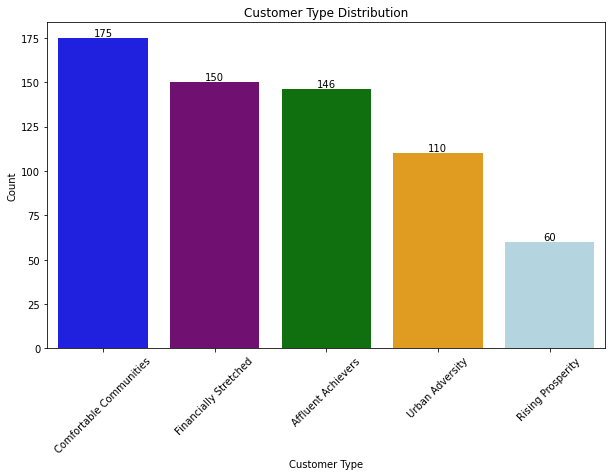

In [22]:
# Count the number of customers per customer type
customer_type_counts = customer_data['Customer Type'].value_counts()

# Match the color with ACORN customer type
colors = ["blue", "purple", "green", "orange", "lightblue"]

# Create the bar chart using Seaborn with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_type_counts.index, y=customer_type_counts.values, palette=colors)

plt.title('Customer Type Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Count')

# Rotate x-axis
plt.xticks(rotation=45)
for i in range(len(customer_type_counts.values)):
    plt.text(x=i, y=customer_type_counts.values[i], s=str(customer_type_counts.values[i]), ha='center', va='bottom')
    
plt.show()

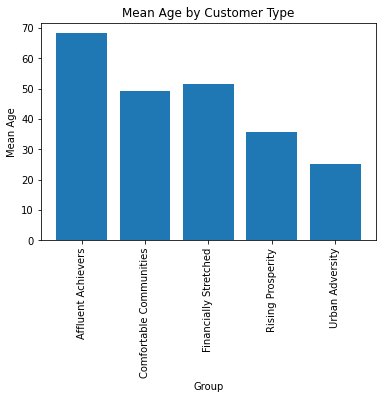

In [23]:
mean_age_by_group = customer_data.groupby('Customer Type')['Age'].mean().reset_index()

# Plot the mean age by group using a bar chart
plt.bar(mean_age_by_group['Customer Type'], mean_age_by_group['Age'])
plt.xlabel('Group')
plt.ylabel('Mean Age')
plt.title('Mean Age by Customer Type')
plt.xticks(rotation=90)
plt.show()

## Generate Customer Ratings for Videos

The logic here is that each customers would have labels that they like and they don't like. Then, their rating for a movie is the average of their rating for each label. Since the rating for each label already has some level of randomness, it is likely that the rating for the movie vary a lot.

In [24]:
def plot_probability(probs, n_col = 3):
    values = ['1','2','3','4','5','6','7','8','9','10']
    
    if len(probs) == 1:
        print("the length of the input list has to have at least two elements")
    else:
        n_row = math.ceil(len(probs)/n_col)
        if n_row == 1:
            fig, axis = plt.subplots(1,len(probs),figsize=(15,n_row*5))

            col = 0
            for n in range(len(probs)):
                prob = probs[n]
                axis[col].bar(values,prob)
                # set title
                axis[col].set_title('Rating Probability %s' % n)

                # move the coordination
                col += 1

        else:
            fig, axis = plt.subplots(n_row, n_col,figsize=(n_col*5,n_row*5),sharey=True)

            row = 0
            col = 0
            for n in range(len(probs)):
                prob = probs[n]
                # print(row, col)
                axis[row,col].bar(values,prob)

                # set title
                axis[row,col].set_title('Rating Probability %s' % (n+1))

                # move the coordination
                col += 1
                if col == n_col:
                    col = 0
                    row = row + 1

In [25]:
probs_high = [[0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.15, 0.20, 0.10, 0.10],
        [0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.15, 0.20, 0.25, 0.15],
        [0.02, 0.03, 0.05, 0.07, 0.10, 0.20, 0.20, 0.20, 0.10, 0.03]]
probs_medium = [[0.05, 0.10, 0.10, 0.15, 0.30, 0.17, 0.05, 0.04, 0.03, 0.01],
               [0.02, 0.10, 0.10, 0.15, 0.20, 0.20, 0.10, 0.05, 0.05, 0.03],
               [0.02, 0.03, 0.05, 0.07, 0.25, 0.15, 0.20, 0.10, 0.10, 0.03]]
probs_low = [[0.10, 0.15, 0.20, 0.15, 0.10, 0.10, 0.10, 0.05, 0.03, 0.02],
             [0.20, 0.20, 0.15, 0.10, 0.10, 0.10, 0.05, 0.05, 0.03, 0.02],
            [0.15, 0.30, 0.15, 0.10, 0.10, 0.07, 0.05, 0.04, 0.03, 0.01]]

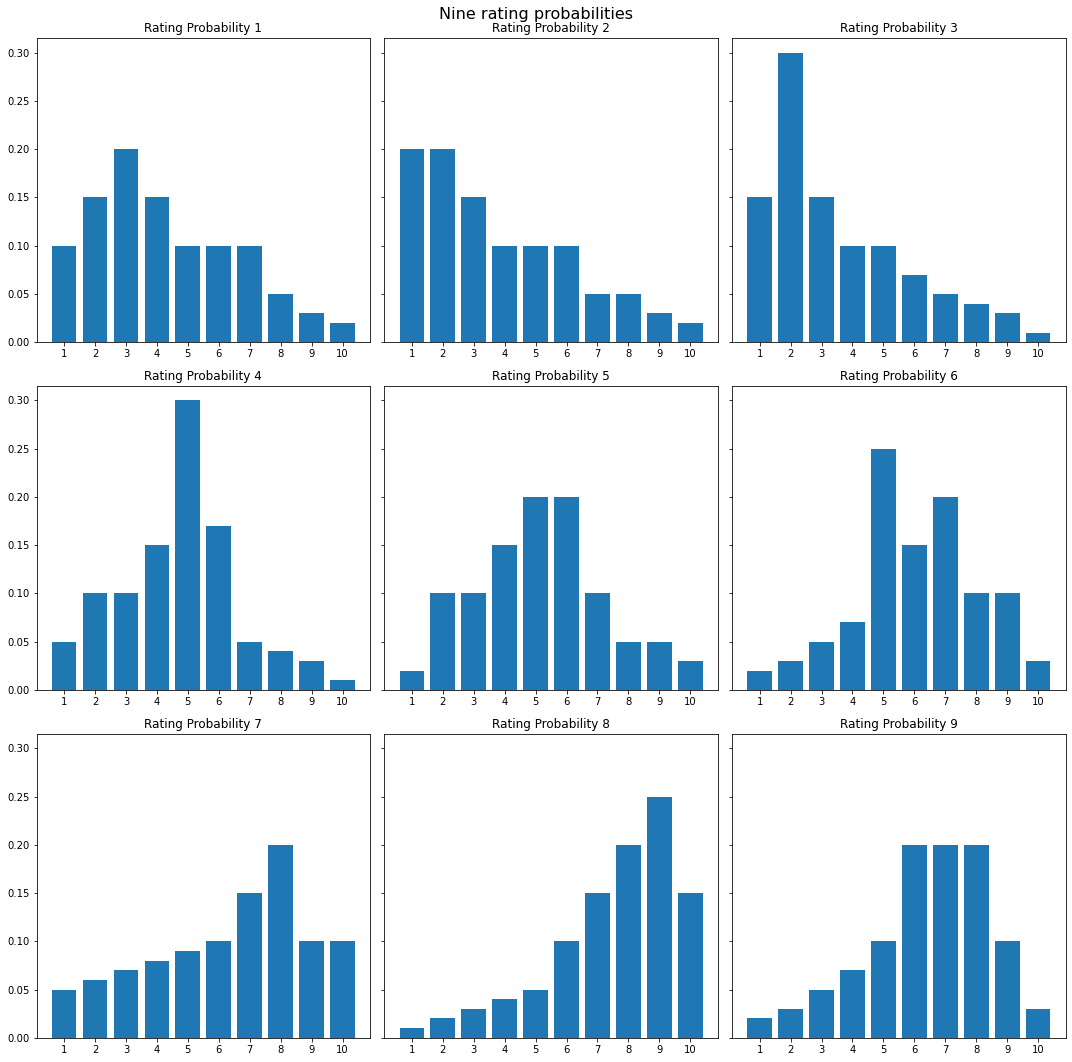

In [26]:
plot_probability(probs_low + probs_medium + probs_high)
plt.suptitle("Nine rating probabilities", fontsize=16)
plt.tight_layout()

In [27]:
rating_levels = pd.DataFrame()
# Set seeds for the random choices
np.random.seed(1234)
for n in range(5):
    # minus one since the last column is video length
    rating_level = np.random.choice(['low','medium','high'],
                                    size = (df.shape[1]-1),
                                    p = [0.3,0.4,0.3])
    rating_level = pd.DataFrame(rating_level).T
    # merge the dataframe
    rating_levels = pd.concat([rating_levels, rating_level])

In [28]:
rating_levels.index = [types['type'] for types in customer_types]

In [29]:
rating_levels

,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
Affluent Achievers,low,medium,medium,high,high,low,low,high,high,high,...,medium,medium,low,low,medium,low,medium,high,high,medium
Rising Prosperity,low,medium,high,high,medium,low,low,low,medium,low,...,medium,medium,medium,high,low,medium,medium,low,medium,low
Comfortable Communities,low,high,low,high,medium,medium,low,low,medium,medium,...,medium,medium,low,low,low,high,medium,medium,high,low
Financially Stretched,medium,medium,high,medium,high,medium,high,high,high,low,...,low,high,low,low,medium,medium,medium,medium,low,low
Urban Adversity,low,low,high,medium,high,high,high,high,medium,medium,...,medium,high,low,low,medium,medium,high,high,medium,low


Each row is a customer type, and each column is a label. The value is how much this customer type likes the label.

genereate the likescale value of each customer type for each label. Then, we will assign a value to each label accroding to the 9 distribution patterns. Then, these values are multiplyed with the number of appearence of the label, where average value of the non-zero values are taken as the final rating of the movie by this customer.

In [30]:
def generate_rating_for_vid(rough_ratings):
    labels_rates = []
    for n in range(rough_ratings.shape[1]):
        rate = rough_ratings.iloc[:,n][0]
        # print(rate)
        if rate == 'high':
            random.seed(10)
            rating_prob = random.choice(probs_high)

        elif rate == 'medium':
            random.seed(10)
            rating_prob = random.choice(probs_medium)
            
        elif rate == 'low':
            random.seed(10)
            rating_prob = random.choice(probs_low)
            
        label_rate = np.random.choice(range(1, 11),
                                          size = 1,
                                          p = rating_prob)[0]
        labels_rates.append(label_rate)
    return labels_rates

In [31]:
all_customer_video_ratings = []
# generate the rating for each video by each customer
for n_customer in range(customer_data.shape[0]):
    video_ratings = []
    # get the rought ratings for each label
    rough_ratings = rating_levels.loc[rating_levels.index == customer_data.iloc[n_customer,:][0],:]
    # convert each rough rating to specific numeric values
    label_rates = generate_rating_for_vid(rough_ratings)
    
    for n in range(df.shape[0]):
        label_count = df.iloc[n,:][:-1]
        rate = np.multiply(label_rates, label_count).sum() / label_count.sum()
        rate = round(rate,2)
        video_ratings.append(rate)
    all_customer_video_ratings.append(video_ratings)

In [32]:
all_customer_video_ratings_flatten = np.array(all_customer_video_ratings).flatten()

In [33]:
len(all_customer_video_ratings_flatten)

26922

In [34]:
video_columns = [f"v{i+1}_rating" for i in range(n_files)]
customer_video_ratings = pd.DataFrame(all_customer_video_ratings,
                                      columns=video_columns)

In [35]:
all_customer_video_ratings_flatten.min()

1.75

In [36]:
all_customer_video_ratings_flatten.max()

8.75

# Tidy Data

Create a dataframe where each row contains the video label information and the customer information, with the Y being the specific rating of the video from the specific customer.

In [37]:
# Create a list to store the copies of the DataFrame
customer_data_list = [customer_data.copy() for _ in range(n_files)]

# Concatenate the DataFrame copies by row
customer_data_list_combined = pd.concat(customer_data_list, ignore_index=True)

In [38]:
customer_data_list_combined.shape

(26922, 7)

In [39]:
df['video_id'] = df.index

In [40]:
# Create a list to store the copies of the DataFrame
df_list = [df.copy() for _ in range(customer_data.shape[0])]

# Concatenate the DataFrame copies by row
df_list_combined = pd.concat(df_list, ignore_index=True)

In [41]:
df_list_combined.shape

(26922, 237)

In [42]:
df_list_combined = df_list_combined.sort_values(by='video_id').reset_index(drop=True)

In [43]:
full_df = pd.concat([customer_data_list_combined, df_list_combined], axis=1)

In [44]:
# Add the ratings
full_df['rating'] = all_customer_video_ratings_flatten

In [45]:
full_df.shape

(26922, 245)

In [46]:
full_df.head(2)

,Customer Type,Age,House Type,Children at Home,House Tenure,Income,Gender,Accessories,Adult,Advertisement,...,Water,Weapon,Wedding,Wine,Wine Glass,Woman,Wood,content_lengths,video_id,rating
0,Affluent Achievers,79,Detached house,0,Owned outright,40,Male,0,21,0,...,0,0,21,0,0,21,0,53280,0,6.36
1,Affluent Achievers,57,Detached house,0,Owned outright,39,Male,0,21,0,...,0,0,21,0,0,21,0,53280,0,6.21


In [47]:
full_df[['Customer Type','rating']].groupby(['Customer Type']).mean()

,rating
Customer Type,
Affluent Achievers,5.501029
Comfortable Communities,5.503894
Financially Stretched,5.462267
Rising Prosperity,5.486476
Urban Adversity,5.462978


In [48]:
ratings0 = full_df.loc[full_df['video_id'] == 0, :][['Customer Type','rating']].groupby(['Customer Type']).mean()
ratings1 = full_df.loc[full_df['video_id'] == 1, :][['Customer Type','rating']].groupby(['Customer Type']).mean()
ratings2 = full_df.loc[full_df['video_id'] == 2, :][['Customer Type','rating']].groupby(['Customer Type']).mean()
ratings3 = full_df.loc[full_df['video_id'] == 3, :][['Customer Type','rating']].groupby(['Customer Type']).mean()

In [49]:
from scipy.stats import f_oneway

# Conduct the one-way ANOVA
f_oneway(ratings0, ratings1, ratings2, ratings3)

F_onewayResult(statistic=array([0.24502553]), pvalue=array([0.86363925]))

In [50]:
# save the data
full_df.to_csv('full_customer_video_ratings.csv', index=False)